In [47]:
# Import Libraries to analyize data 

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [123]:
# Read Dataset

In [124]:
insurance = pd.read_csv("/Users/AshleyAllen/Documents/insurance 2.csv")

In [125]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [126]:
# Convert columns to categorical values

In [127]:
from sklearn.preprocessing import OrdinalEncoder

In [128]:
ordinal_encoder = OrdinalEncoder()

object_cols = ['region', 'smoker', 'sex']
insurance[object_cols] = ordinal_encoder.fit_transform(insurance[object_cols])

In [129]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [130]:
# Display the total rows and columns

In [131]:
insurance.shape

(1338, 7)

In [132]:
# Displayed the data types of the columns

In [133]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


In [134]:
# returns description of the data in the DataFrame

In [135]:
insurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [136]:
# Check for null values

In [137]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [138]:
# Checked for Unique values

In [139]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [140]:
# Correlation Matrix

In [141]:
corelation = insurance.corr()

<AxesSubplot:>

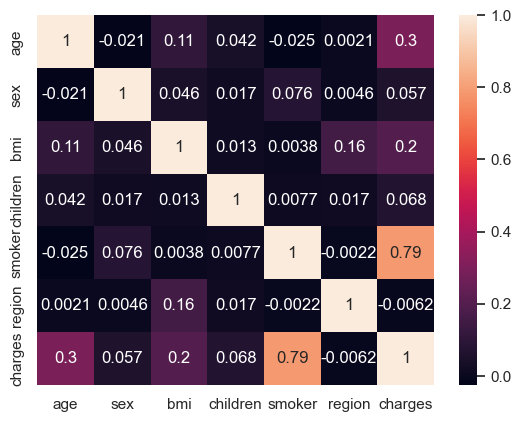

In [142]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

In [143]:
# Barplot showing what sex has more charges

<AxesSubplot:xlabel='sex', ylabel='children'>

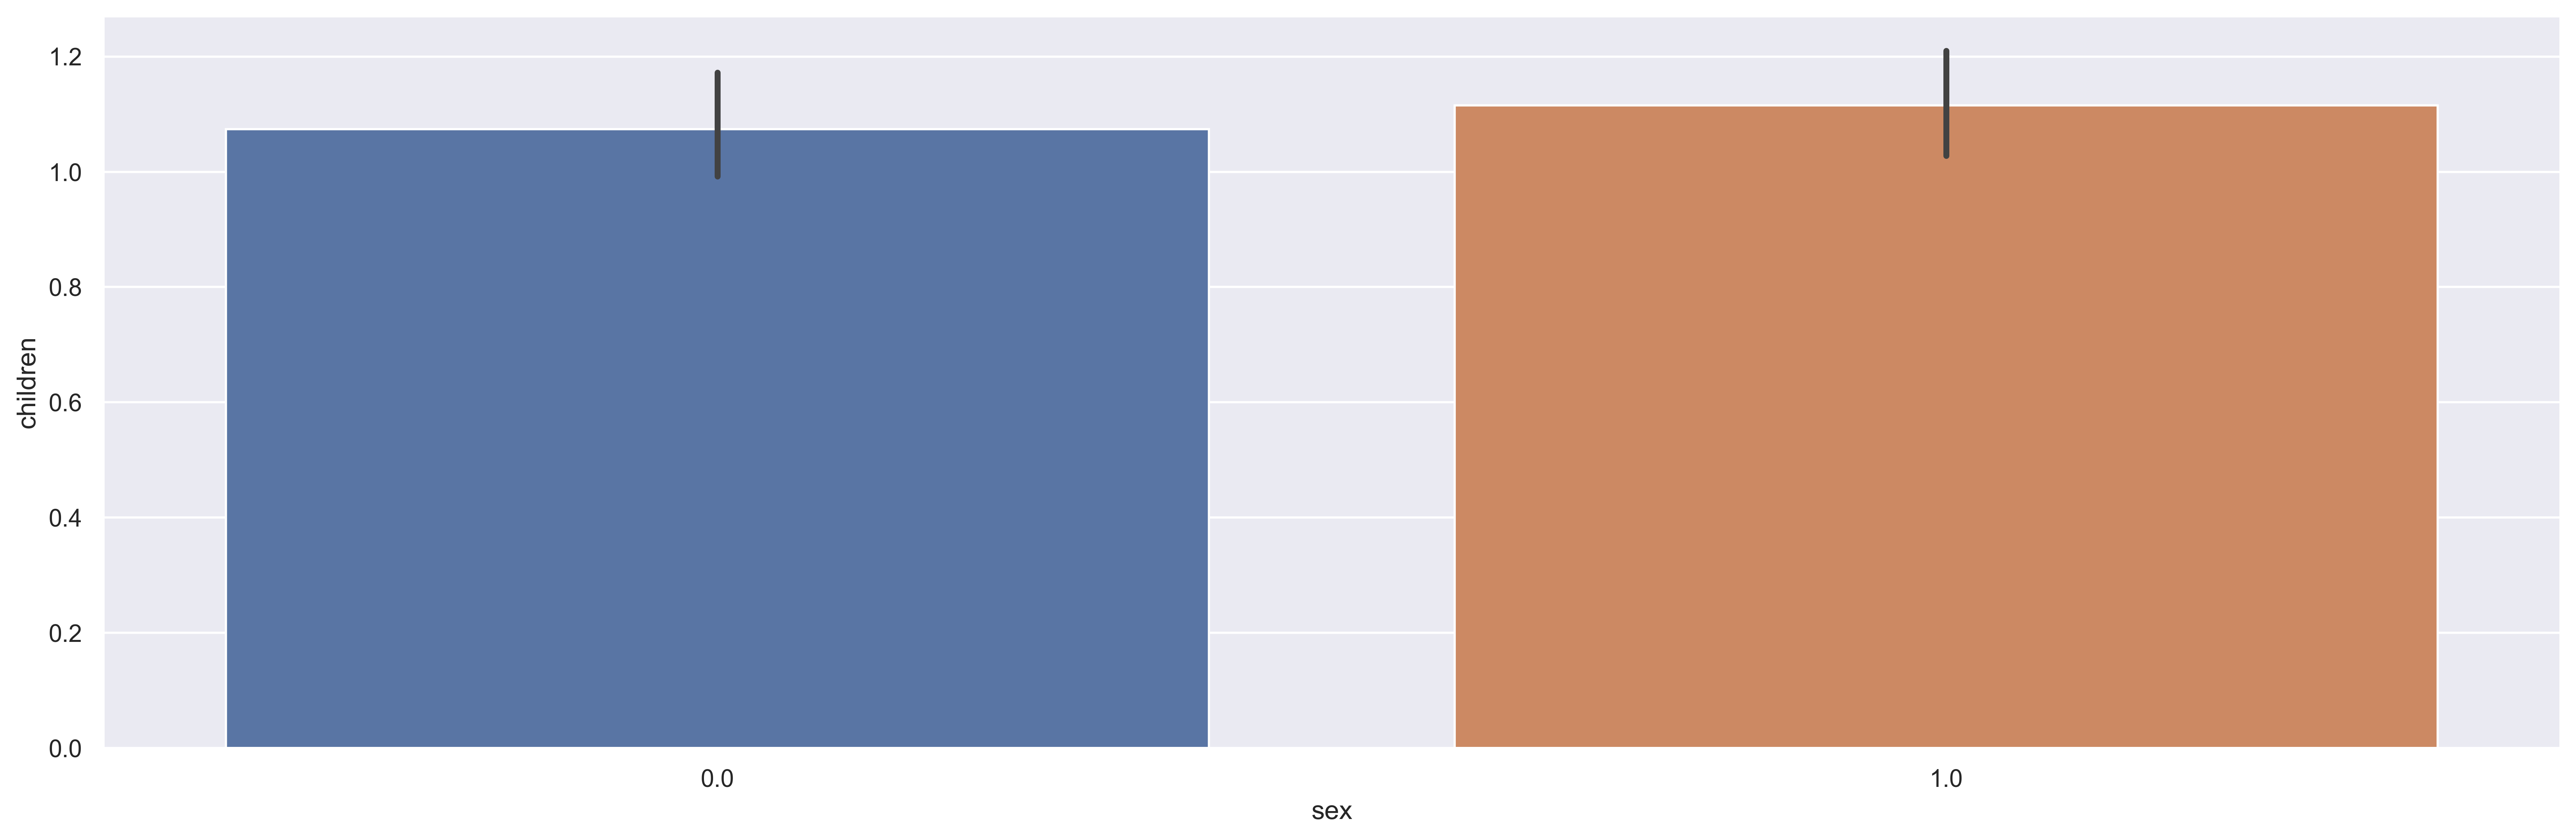

In [144]:
sns.set()
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot( x = 'sex', y = 'children', data = insurance)

In [145]:
# What percentage of patients are smokers

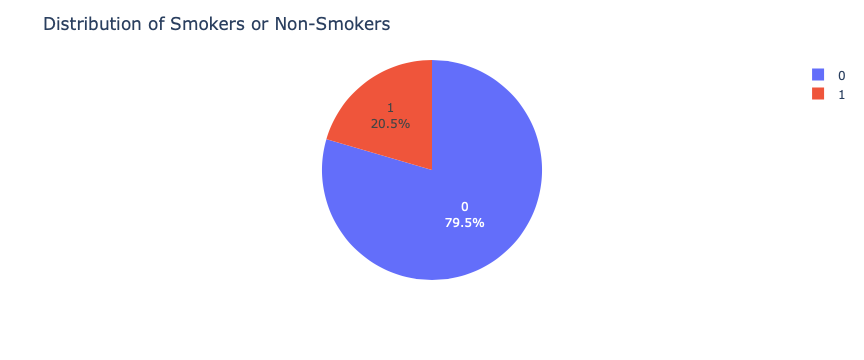

In [147]:
fig = px.pie(insurance['smoker'].value_counts().reset_index(), values='smoker', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_text="Distribution of Smokers or Non-Smokers")
fig.show()

In [148]:
# Show what regions have more charges

<AxesSubplot:xlabel='region', ylabel='charges'>

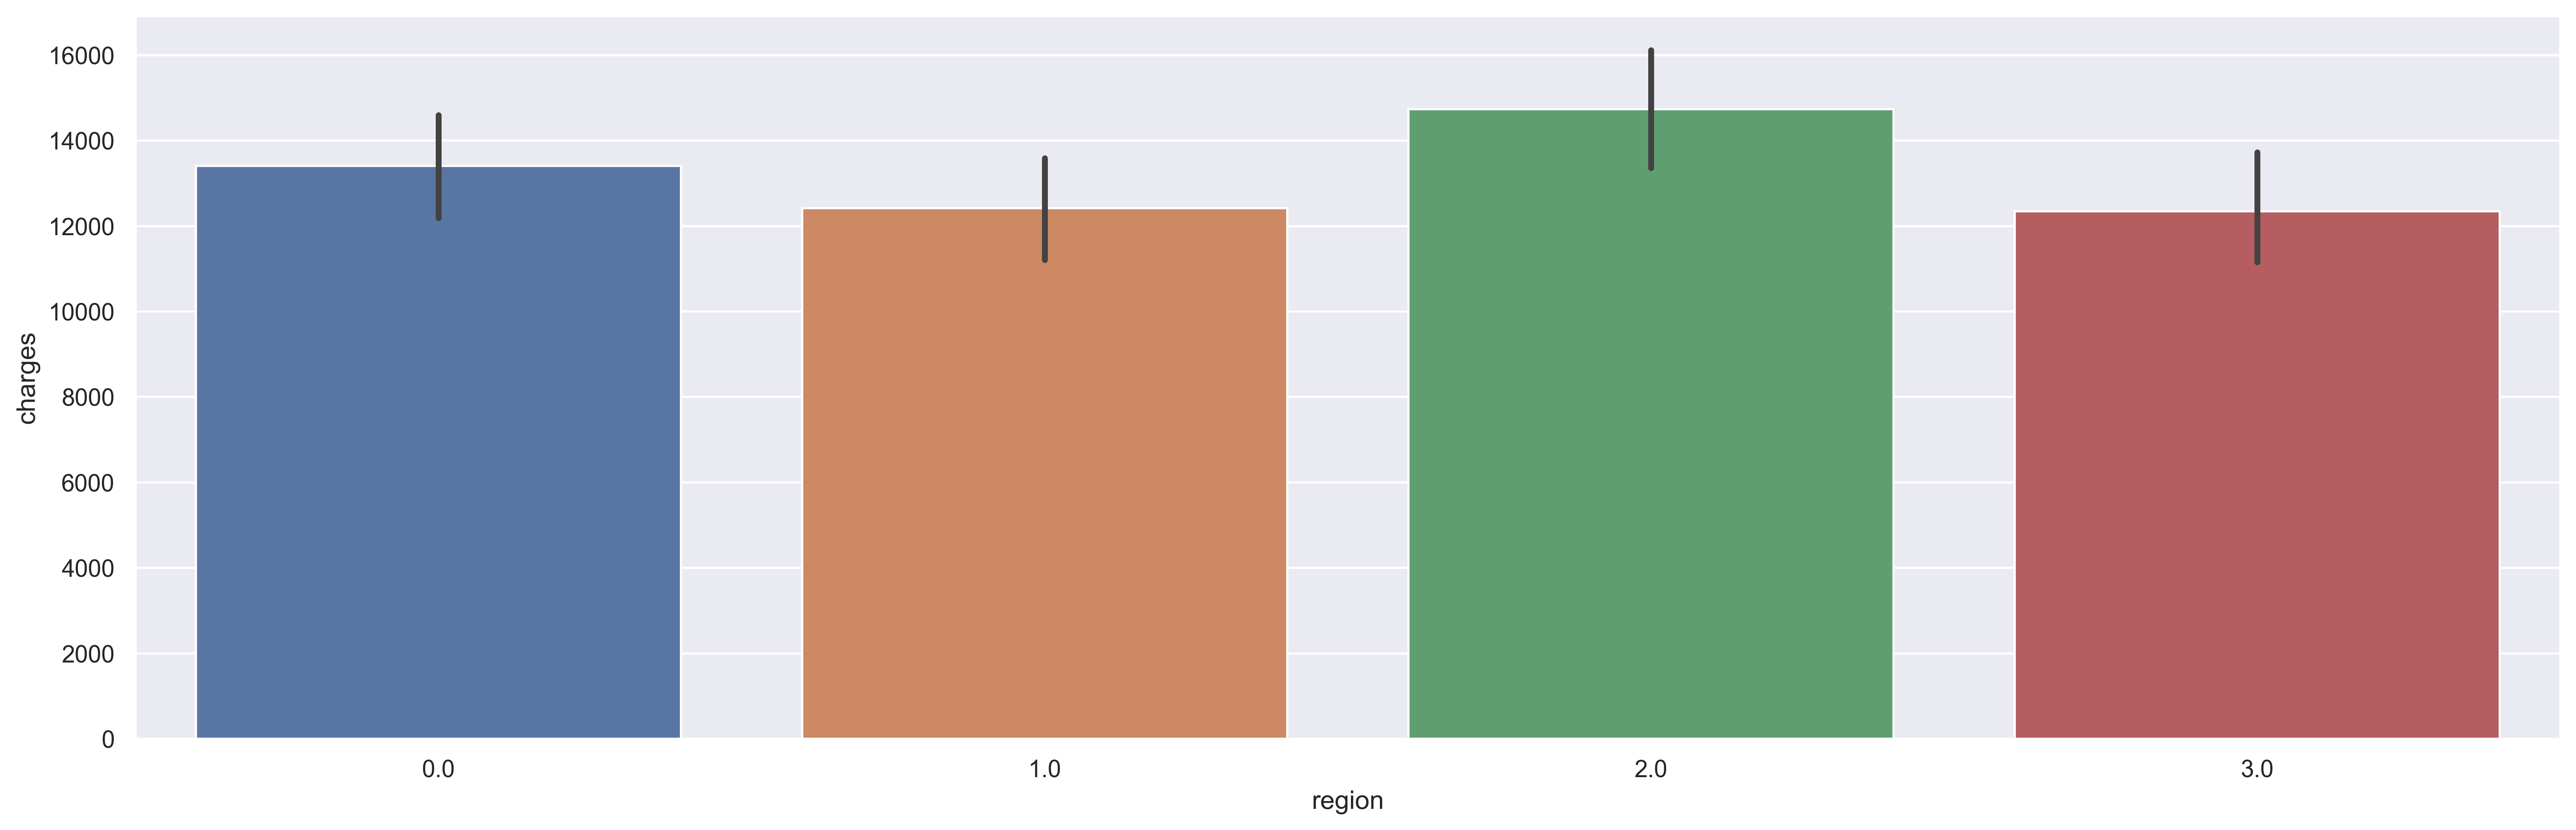

In [118]:
sns.set()
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot( x = 'region', y = 'charges', data = insurance)

In [ ]:
# What is the average BMi of all Patients

In [75]:
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity class I', 'Obesity class II', 'Obesity class III']
ranges = ['<18.5', '18.5-24.9', '25-29.9', '30-34.9', '35-39.9','>=40']
pd.DataFrame(list(zip(labels, ranges)),columns=['labels', 'ranges'])

,labels,ranges
0,Underweight,<18.5
1,Normal weight,18.5-24.9
2,Overweight,25-29.9
3,Obesity class I,30-34.9
4,Obesity class II,35-39.9
5,Obesity class III,>=40


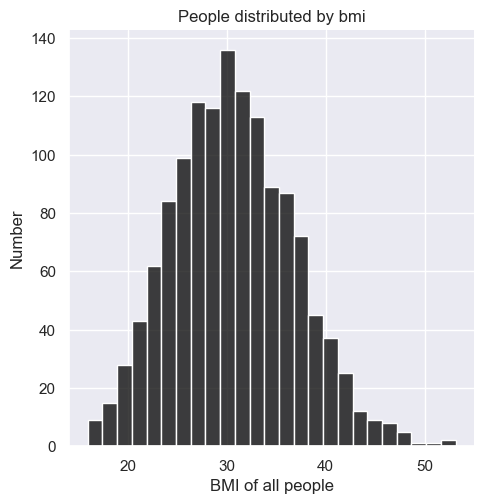

In [150]:
g = sns.displot(data=insurance, x='bmi', kind='hist',color='black', aspect=1, legend=False)
for ax in g.axes.flat:
    ax.set(title='People distributed by bmi',
          xlabel='BMI of all people',
           ylabel='Number')

In [151]:
# Univariate Distribution Plot

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='charges', ylabel='Density'>

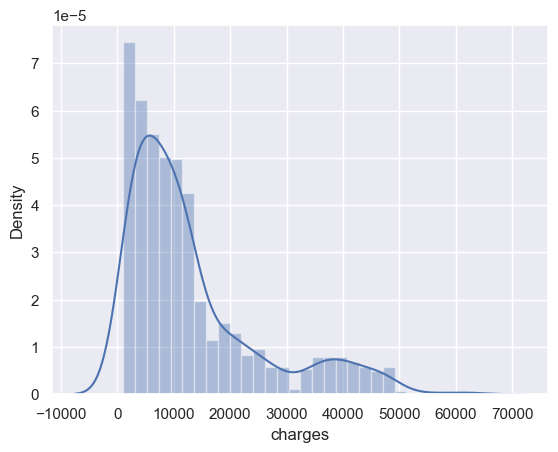

In [152]:
sns.distplot(insurance['charges'])